# Preparación del entorno (limpieza y preprocesamiento) y carga de datos

Este código carga los datos, realiza algunas transformaciones básicas y prepara los conjuntos de entrenamiento y prueba.

In [180]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar los datos
# Asumimos que los datos están en un archivo CSV llamado 'airline_satisfaction.csv' en el directorio raíz
df = pd.read_csv('airline_passenger_satisfaction.csv')

# Visualizar las primeras filas y la información del DataFrame
print(df.head())
print(df.info())

# Verificar valores nulos
print(df.isnull().sum())

# Estadísticas descriptivas
print(df.describe())

# Convertir variables categóricas a numéricas
df = pd.get_dummies(df, columns=['Gender', 'Customer Type', 'Type of Travel', 'Class'], drop_first=True)

# Separar características y variable objetivo
X = df.drop('satisfaction', axis=1)
y = df['satisfaction']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

   Unnamed: 0      id  Gender      Customer Type  Age   Type of Travel  \
0           0   70172    Male     Loyal Customer   13  Personal Travel   
1           1    5047    Male  disloyal Customer   25  Business travel   
2           2  110028  Female     Loyal Customer   26  Business travel   
3           3   24026  Female     Loyal Customer   25  Business travel   
4           4  119299    Male     Loyal Customer   61  Business travel   

      Class  Flight Distance  Inflight wifi service  \
0  Eco Plus              460                      3   
1  Business              235                      3   
2  Business             1142                      2   
3  Business              562                      2   
4  Business              214                      3   

   Departure/Arrival time convenient  ...  Inflight entertainment  \
0                                  4  ...                       5   
1                                  2  ...                       1   
2                

In [ ]:
# Ejemplo para entender la importancia de random_state al hacer la división de los datos utilizando train_test_split (al decir test_size=0.2 estamos diciendo que el 20% de los datos se utilizarán para el conjunto de prueba y el 80% restante para el conjunto de entrenamiento)

# Ejemplo simple de datos
data = {'feature1': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
        'target': [0, 1, 0, 1, 0, 1, 0, 1, 0, 1]}

df = pd.DataFrame(data)

# División de datos sin random_state
X_train1, X_test1, y_train1, y_test1 = train_test_split(df['feature1'], df['target'], test_size=0.2)

# División de datos con random_state=42
X_train2, X_test2, y_train2, y_test2 = train_test_split(df['feature1'], df['target'], test_size=0.2, random_state=42)

print("Sin random_state:")
print("X_test1:", X_test1)

print("\nCon random_state=42:")
print("X_test2:", X_test2)

Tratamiento de los valores perdidos: ¿eliminarlos o imputarlos? Ambas opciones son válidas. Sin embargo imputar los valores faltantes en la columna "Arrival Delay in Minutes" probablemente sea la mejor opción en este caso. Dado que solo el 0.3% de los datos está perdido, una imputación simple, como la media o mediana, podría ser suficiente y evitaría la pérdida de datos, manteniendo la integridad del dataset para el modelado de machine learning. Además, conservar todas las filas permite capturar toda la variabilidad potencial de los datos, lo que podría ser beneficioso para predecir el grado de satisfacción de los pasajeros. 

¿Media o mediana? Si no tenemos valores atípicos significativos y su distribución es simétrica nos decantaríamos por la media. La mediana podría ser una buena opción si los datos estuvieran sesgados, consiguiendo representar mejor el valor típico cuando los datos no son simétricos. 

In [ ]:
# # Imputamos los valores nulos con la media
# df['Arrival Delay in Minutes'] = df['Arrival Delay in Minutes'].fillna(df['Arrival Delay in Minutes'].mean())

# Imputamos los valores nulos con la mediana
df['Arrival Delay in Minutes'] = df['Arrival Delay in Minutes'].fillna(df['Arrival Delay in Minutes'].median())

### ¿Cómo decidir?
Si observas que la distribución es simétrica, la media puede ser la mejor opción.
Si la distribución está sesgada o tiene outliers, entonces la mediana sería más apropiada.
En muchos casos reales de retrasos de vuelos, es común que la distribución esté sesgada hacia valores más bajos, pero con algunos vuelos con retrasos muy altos. Por lo tanto, la mediana suele ser preferida en esos contextos.

In [ ]:
# Histograma para visualizar la distribución
sns.histplot(df['Arrival Delay in Minutes'].dropna(), bins=30)
plt.title("Distribución de Arrival Delay in Minutes")
plt.show()

# Estadísticas descriptivas
print(df['Arrival Delay in Minutes'].describe())


In [ ]:
# Pasamos la variable "Arrival Delay in Minutes" a int, ya que no tiene sentido que sea float
# Para convertir una columna de tipo float a int 
df['Arrival Delay in Minutes'] = df['Arrival Delay in Minutes'].astype(int)

In [ ]:
df['Arrival Delay in Minutes'].head()

In [ ]:
# Borramos la primera columna que se crea al cargar el archivo CSV
columnas_a_borrar = ['Unnamed: 0']
df = df.drop(columnas_a_borrar, axis=1)

In [ ]:
# comprobamos columnas imprimiéndolas
print(df.columns)

# EDA

Este código genera visualizaciones para ayudarnos a entender la distribución de la satisfacción del cliente, las correlaciones entre variables, y cómo se relacionan las diferentes características con la satisfacción.

1. Separar las variables numéricas y categóricas.
2. Codificar la variable objetivo 'satisfaction'.
3. Calcular la correlación solo para las variables numéricas.


<Figure size 2000x1500 with 0 Axes>

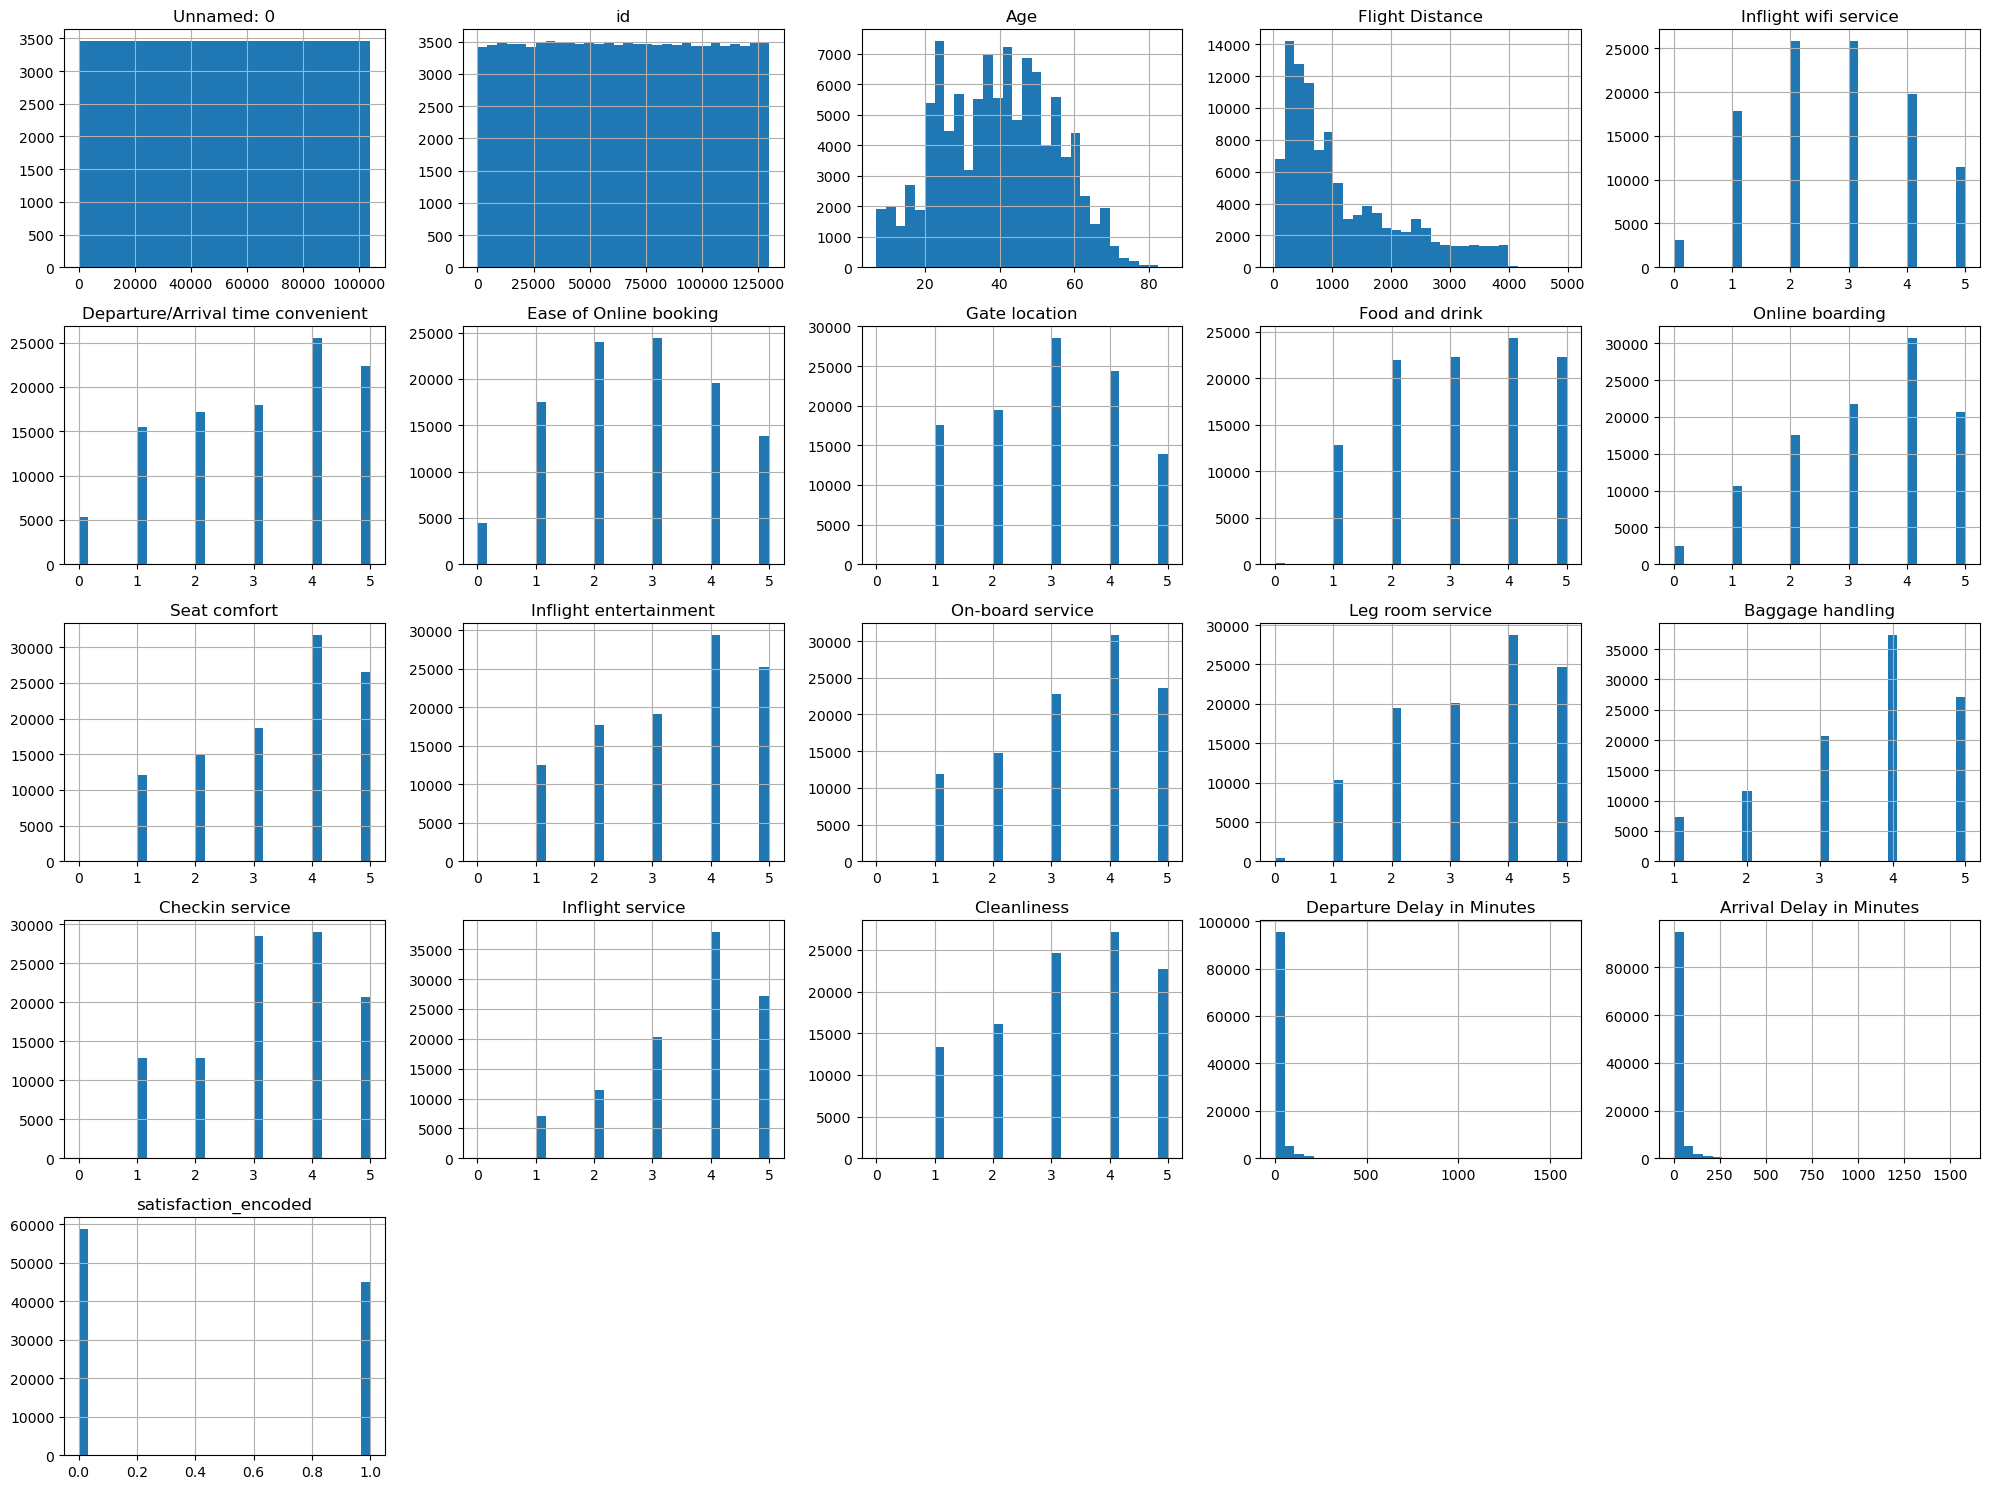

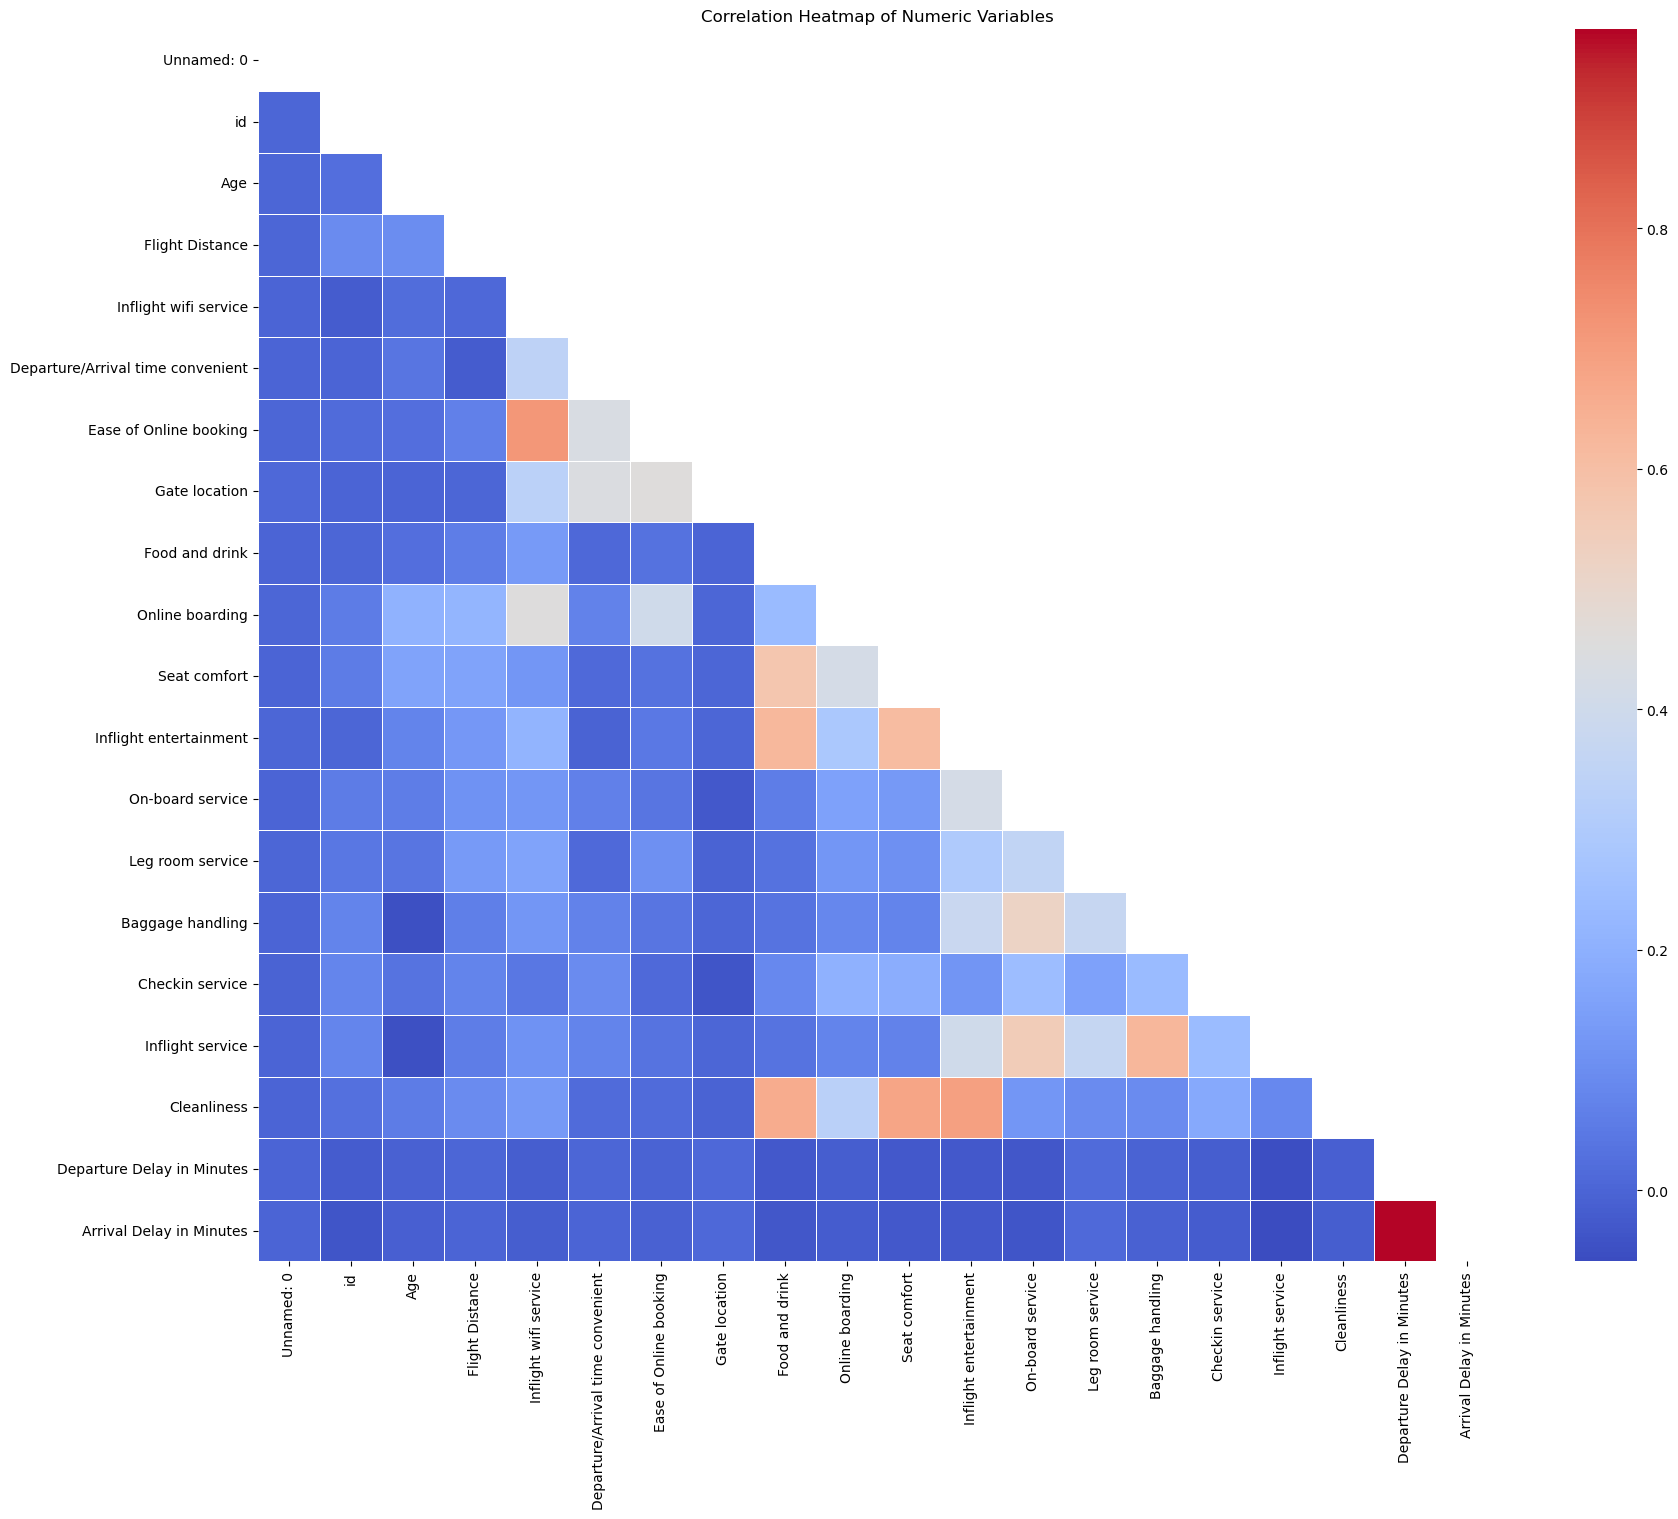

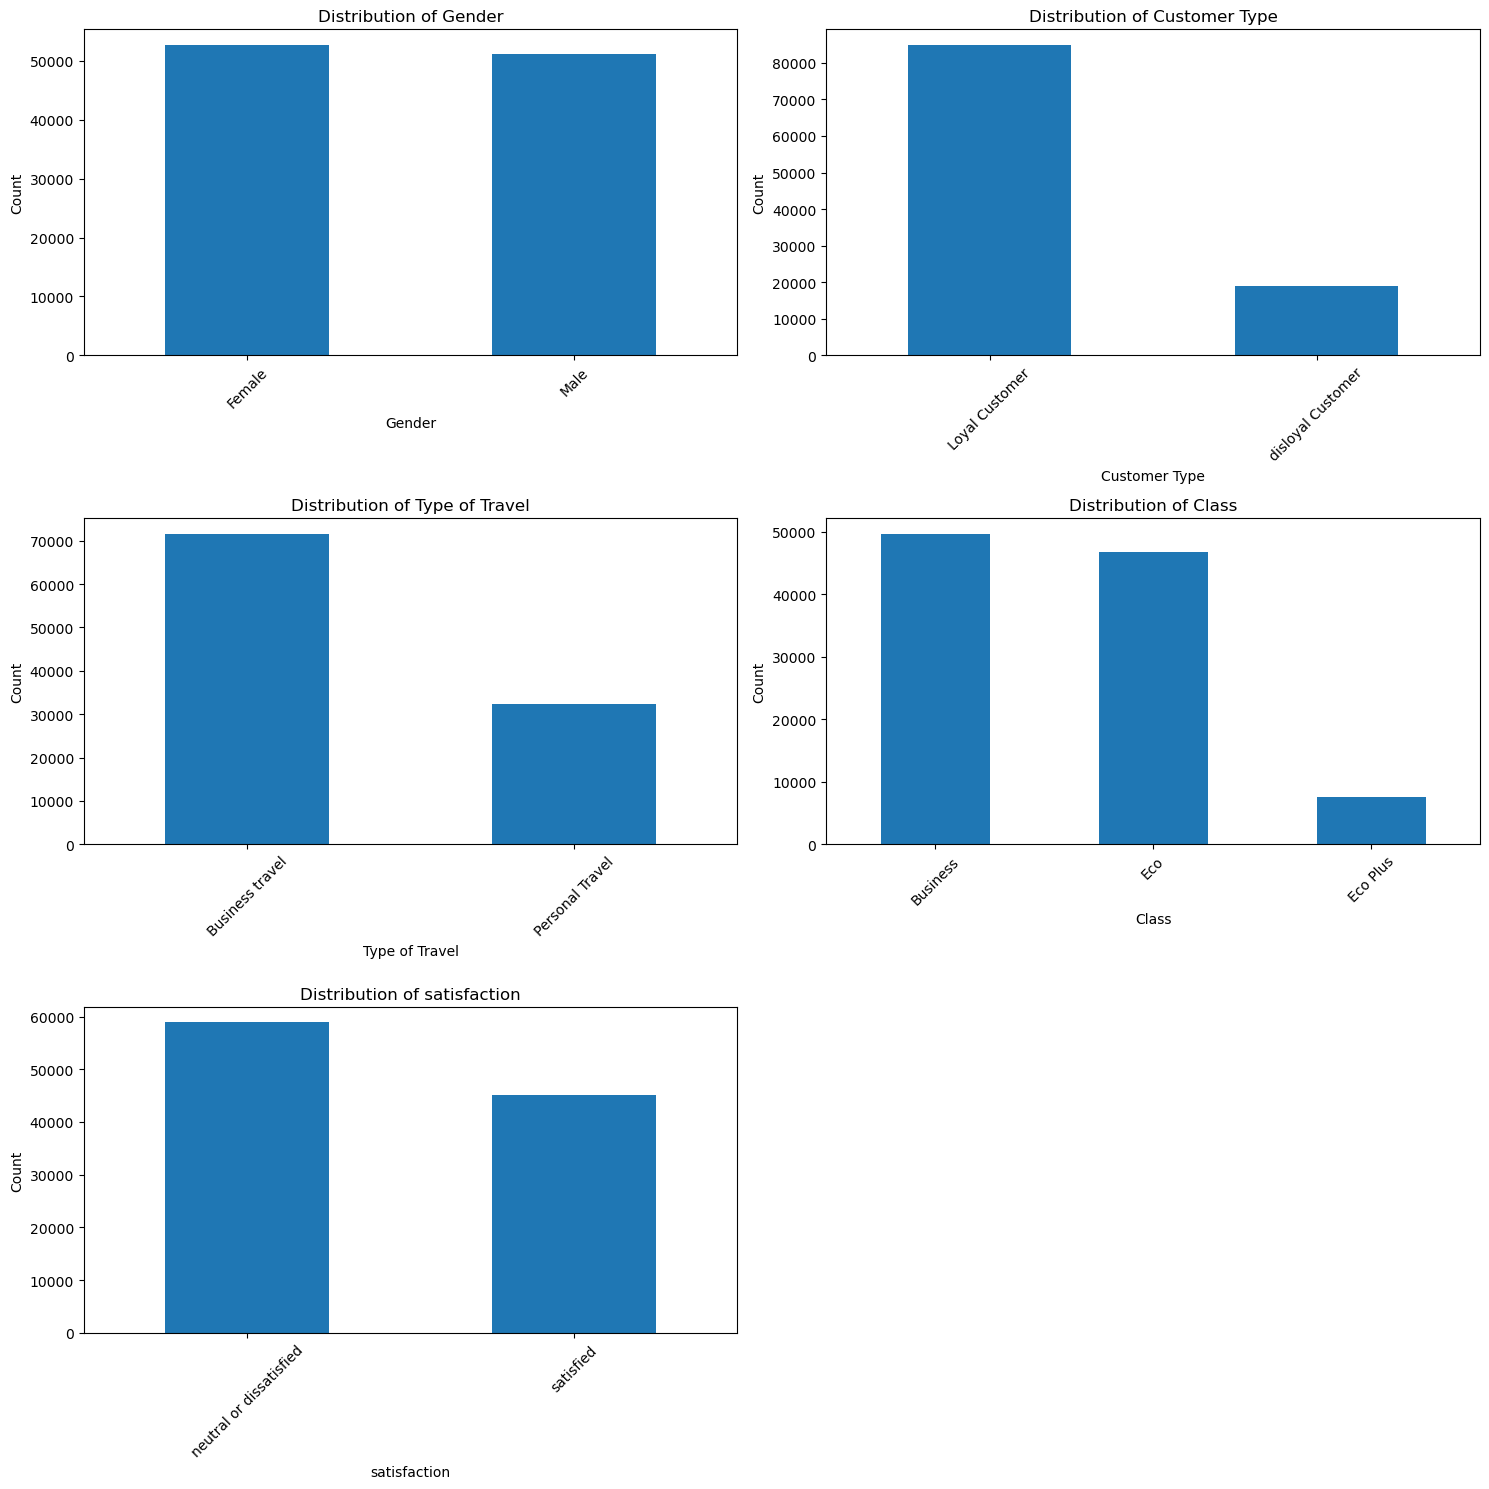

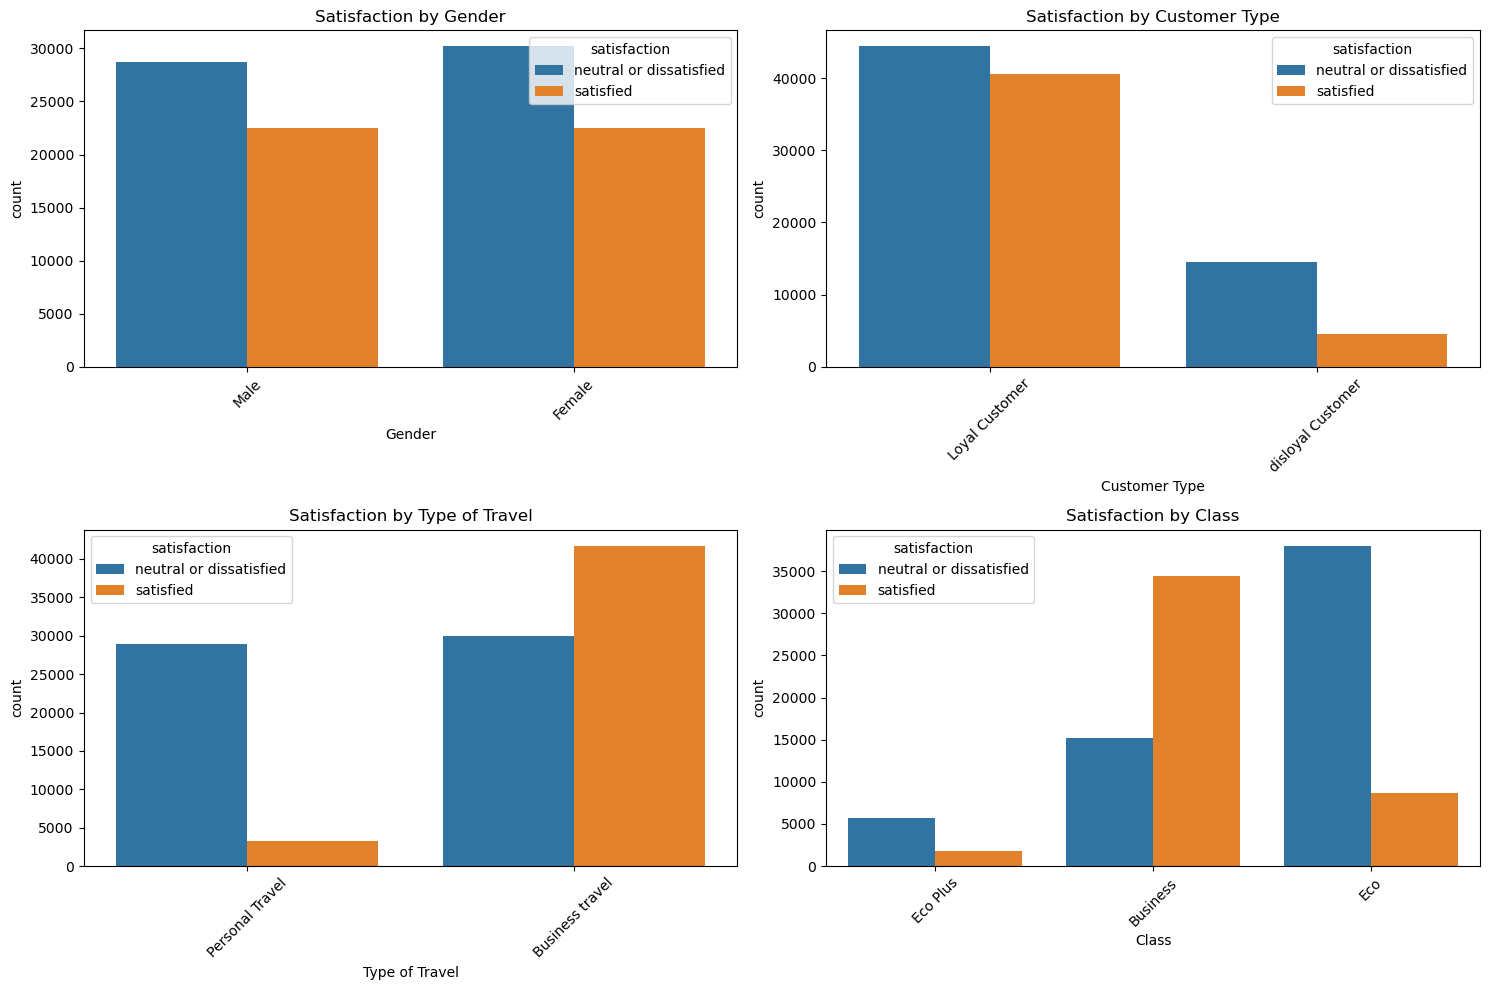

In [218]:
from sklearn.preprocessing import LabelEncoder

# Cargar los datos
df = pd.read_csv('airline_passenger_satisfaction.csv')  # Asegúrate de poner la ruta correcta

# Separar variables numéricas y categóricas
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = df.select_dtypes(include=['object']).columns

# # Incluir la variable codificada de satisfacción
# numeric_columns = numeric_columns.append(pd.Index(['satisfaction_encoded']))

# Codificar la variable objetivo
le = LabelEncoder()
df['satisfaction_encoded'] = le.fit_transform(df['satisfaction'])

# Análisis de variables numéricas
plt.figure(figsize=(20, 15))
df.hist(bins=30, figsize=(20, 15))
plt.tight_layout()
plt.show()

# Correlación entre variables numéricas con heatmap
correlation_matrix = df[numeric_columns].corr()
# Generar la máscara para ocultar la mitad superior
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title('Correlation Heatmap of Numeric Variables')
plt.show()

# Análisis de variables categóricas
# for col in categorical_columns:
#     plt.figure(figsize=(10, 6))
#     df[col].value_counts().plot(kind='bar')
#     plt.title(f'Distribution of {col}')
#     plt.ylabel('Count')
#     plt.xticks(rotation=45)
#     plt.show()
# ----------------------------------
# Definir el número de columnas y filas
n_cols = 2
n_rows = (len(categorical_columns) + 1) // 2  # Calcular el número de filas necesarias

# Crear subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, 5 * n_rows))
axes = axes.flatten()  # Aplanar los ejes para facilitar el manejo

# Graficar cada columna categórica
for i, col in enumerate(categorical_columns):
    df[col].value_counts().plot(kind='bar', ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_ylabel('Count')
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)

# Eliminar gráficos sobrantes si hay un número impar de columnas
for j in range(len(categorical_columns), len(axes)):
    fig.delaxes(axes[j])

# Ajustar el espaciado entre gráficos
plt.tight_layout()
plt.show()

# Relación entre variables categóricas y la satisfacción
# for col in categorical_columns:
#     if col != 'satisfaction':
#         plt.figure(figsize=(12, 6))
#         sns.countplot(data=df, x=col, hue='satisfaction')
#         plt.title(f'Satisfaction by {col}')
#         plt.xticks(rotation=45)
#         plt.show()
# ----------------------------------
# Filtrar las variables categóricas (excluyendo 'satisfaction')
filtered_columns = [col for col in categorical_columns if col != 'satisfaction']

# Definir el número de columnas y filas
n_cols = 2
n_rows = (len(filtered_columns) + 1) // 2  # Calcular el número de filas necesarias

# Crear subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, 5 * n_rows))
axes = axes.flatten()  # Aplanar los ejes para facilitar el manejo

# Graficar cada columna categórica (excepto 'satisfaction')
for i, col in enumerate(filtered_columns):
    sns.countplot(data=df, x=col, hue='satisfaction', ax=axes[i])
    axes[i].set_title(f'Satisfaction by {col}')
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)

# Eliminar gráficos sobrantes si hay un número impar de columnas
for j in range(len(filtered_columns), len(axes)):
    fig.delaxes(axes[j])

# Ajustar el espaciado entre gráficos
plt.tight_layout()
plt.show()

### Relación entre variables categóricas y satisfacción

In [211]:
# Separar variables categóricas
categorical_columns = df.select_dtypes(include=['object']).columns
categorical_columns = categorical_columns.drop('satisfaction', errors='ignore')  # Excluir la variable de satisfacción

# Crear un DataFrame para almacenar las proporciones
proportions = pd.DataFrame()

# Calcular proporciones de satisfacción para cada categoría
for col in categorical_columns:
    # Crear una tabla de contingencia
    contingency_table = pd.crosstab(df[col], df['satisfaction_encoded'])
    # Calcular proporciones de satisfacción
    proportions[col] = contingency_table.apply(lambda x: x / x.sum(), axis=1).iloc[:, 1]  # Proporción de 'satisfied'
    
# Mostrar proporciones
print(proportions)

import scipy.stats as stats

# Crear una lista para almacenar los resultados de la prueba de Chi-cuadrado
chi2_results = []

# Realizar la prueba de Chi-cuadrado para cada variable categórica
for col in categorical_columns:
    contingency_table = pd.crosstab(df[col], df['satisfaction_encoded'])
    chi2_stat, p_value, _, _ = stats.chi2_contingency(contingency_table)
    chi2_results.append({'Variable': col, 'Chi2 Stat': chi2_stat, 'P-Value': p_value})

# Convertir la lista de resultados a un DataFrame
chi2_results_df = pd.DataFrame(chi2_results)

# Mostrar los resultados de la prueba de Chi-cuadrado
print(chi2_results_df)

          Gender  Customer Type  Type of Travel  Class
Gender                                                
Female  0.427371            NaN             NaN    NaN
Male    0.439475            NaN             NaN    NaN
         Variable     Chi2 Stat   P-Value
0          Gender     15.444417  0.000085
1   Customer Type   3657.280805  0.000000
2  Type of Travel  20945.233826  0.000000
3           Class  26471.862944  0.000000


### Correlación en número entre variables numéricas y satisfacción

In [203]:
# Separar variables numéricas y la variable codificada de satisfacción
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
numeric_columns = numeric_columns.drop('satisfaction_encoded', errors='ignore')  # Excluir la variable de satisfacción

# Calcular la correlación entre la variable de satisfacción y cada variable numérica
correlations = df[numeric_columns].apply(lambda x: x.corr(df['satisfaction_encoded']))

# Mostrar las correlaciones
print(correlations)


Unnamed: 0                          -0.004731
id                                   0.013734
Age                                  0.137167
Flight Distance                      0.298780
Inflight wifi service                0.284245
Departure/Arrival time convenient   -0.051601
Ease of Online booking               0.171705
Gate location                        0.000682
Food and drink                       0.209936
Online boarding                      0.503557
Seat comfort                         0.349459
Inflight entertainment               0.398059
On-board service                     0.322383
Leg room service                     0.313131
Baggage handling                     0.247749
Checkin service                      0.236174
Inflight service                     0.244741
Cleanliness                          0.305198
Departure Delay in Minutes          -0.050494
Arrival Delay in Minutes            -0.057582
dtype: float64


### Relación de las variables numéricas con la satisfacción

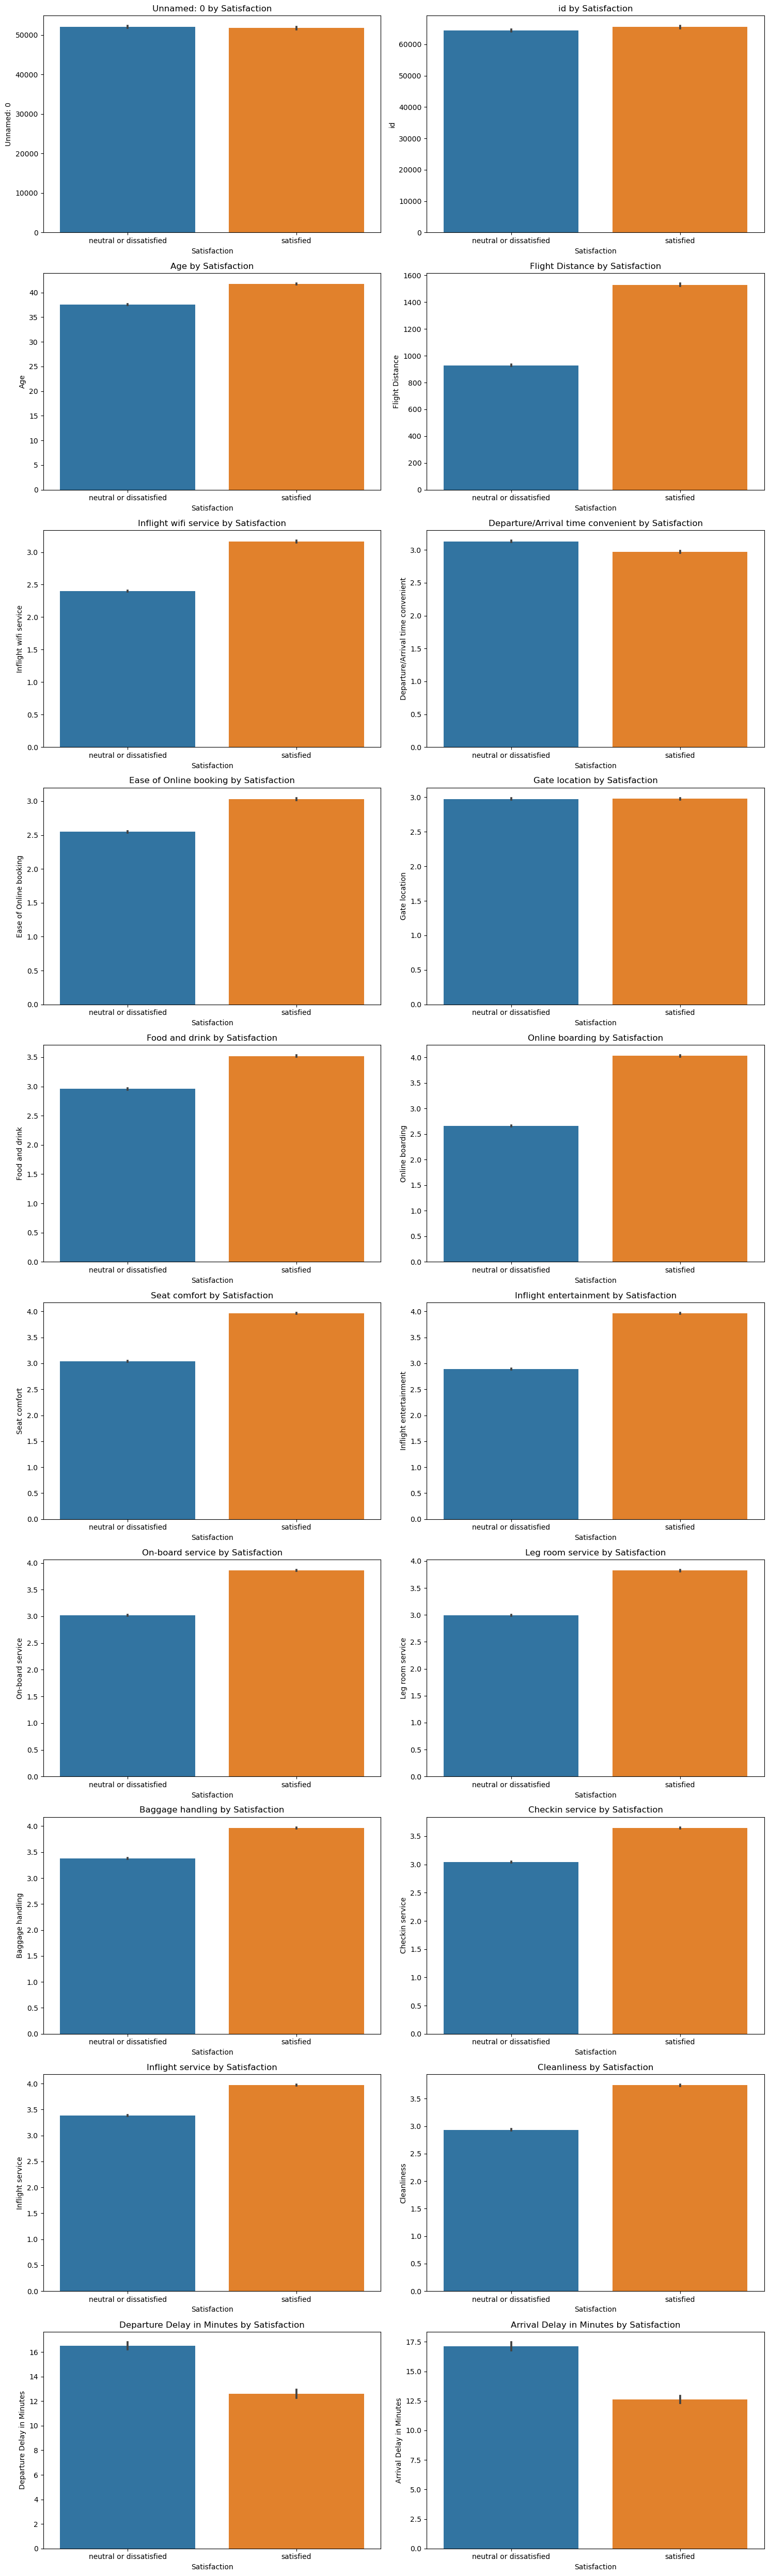

In [192]:
# Definir el número de columnas y filas para los subplots
n_cols = 2
n_rows = (len(numeric_columns) + n_cols - 1) // n_cols  # Calcular el número de filas necesarias

# Crear subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, 5 * n_rows))
axes = axes.flatten()  # Aplanar los ejes para facilitar el manejo

# Graficar cada variable numérica en relación con la satisfacción
for i, col in enumerate(numeric_columns):
    if col != 'satisfaction_encoded':  # No graficar la variable de codificación en sí misma
        # Graficar la variable numérica en relación con la satisfacción
        sns.barplot(x='satisfaction', y=col, data=df, ax=axes[i])
        axes[i].set_title(f'{col} by Satisfaction')
        axes[i].set_ylabel(f'{col}')
        axes[i].set_xlabel('Satisfaction')
    else:
        axes[i].axis('off')  # Desactivar los gráficos vacíos si hay menos variables numéricas

# Eliminar gráficos sobrantes si hay un número impar de variables numéricas
for j in range(len(numeric_columns), len(axes)):
    axes[j].axis('off')

# Ajustar el espaciado entre gráficos
plt.tight_layout()
plt.show()


### Relación enetre variables numércias y satisfacción con gráfica de caja y bigotes para detectar outliers

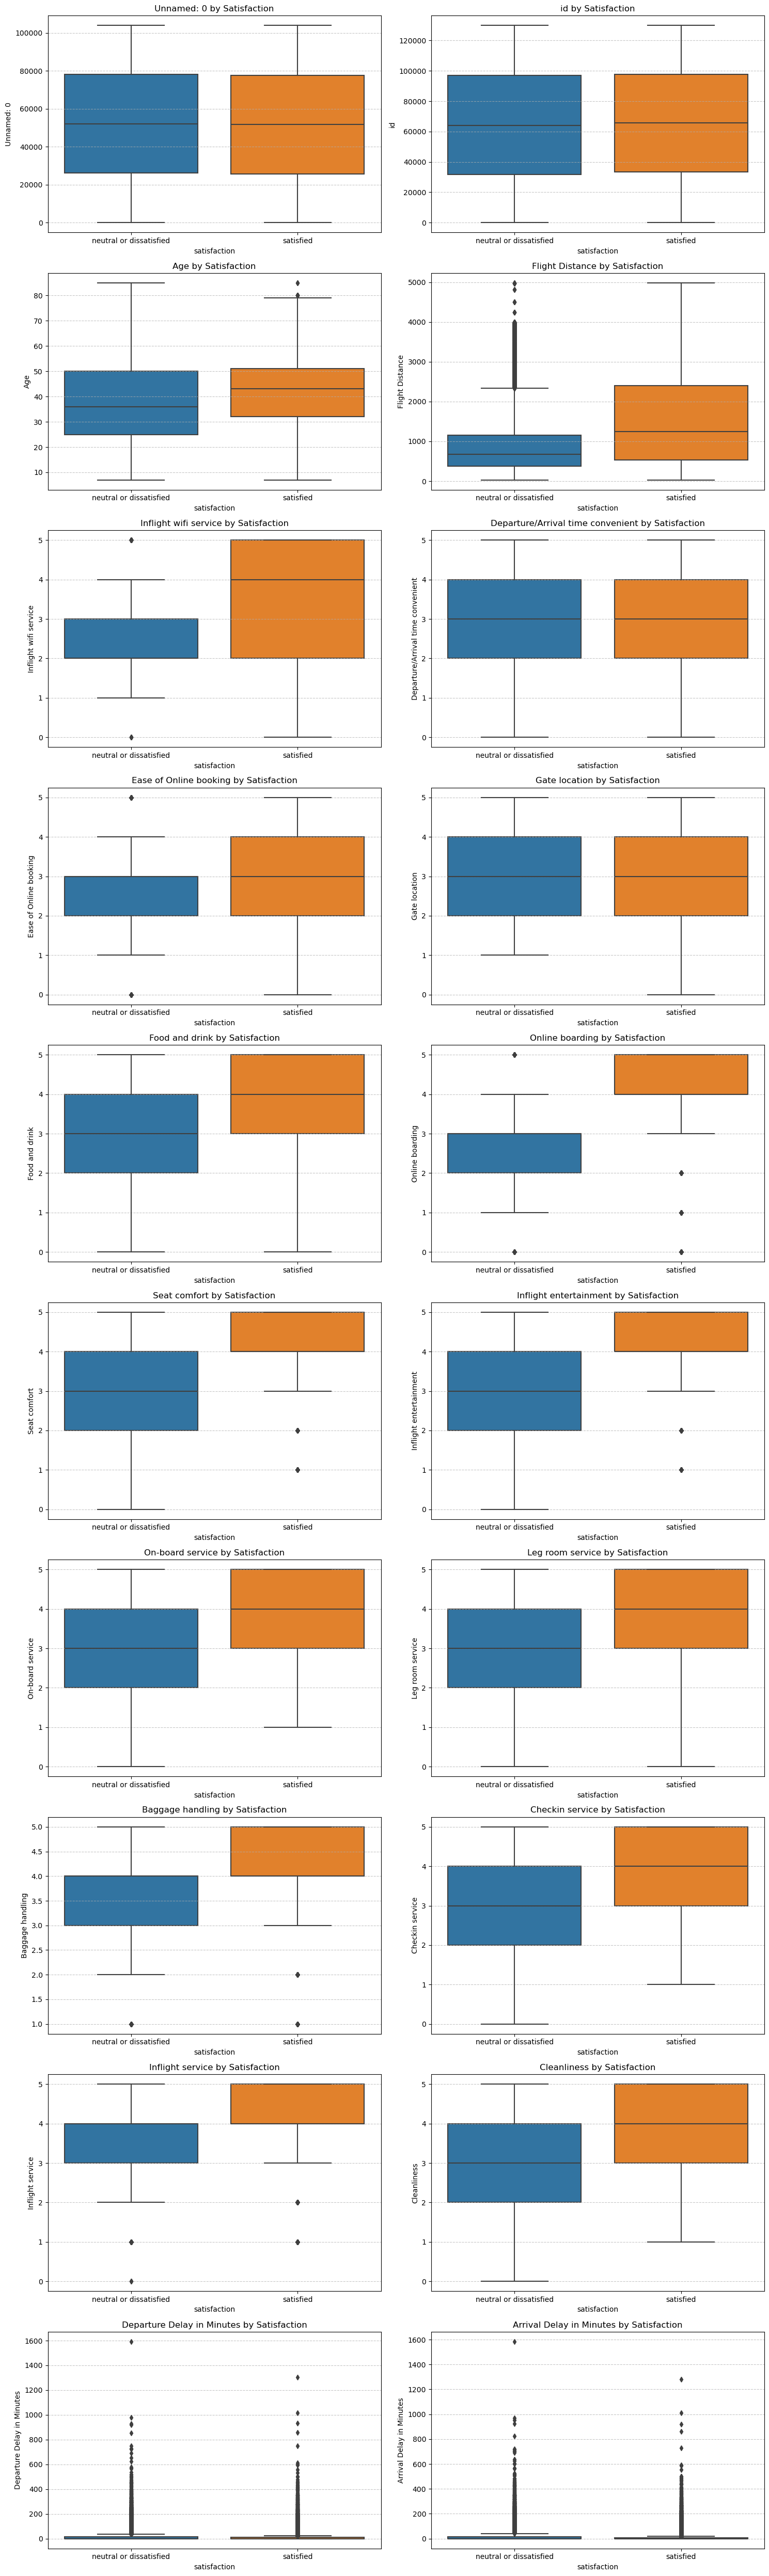

In [159]:
# Definir el número de filas y columnas (2 gráficos por fila)
n_cols = 2
n_rows = len(numeric_columns) // n_cols + (len(numeric_columns) % n_cols > 0)

# Crear subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))

# Aplanar los ejes para que sean más fáciles de manejar
axes = axes.flatten()

# Graficar cada columna numérica
for i, col in enumerate(numeric_columns):
    sns.boxplot(data=df, x='satisfaction', y=col, ax=axes[i])
    axes[i].set_title(f'{col} by Satisfaction')
    axes[i].grid(True, axis='y', linestyle='--', alpha=0.7)

# Eliminar gráficos sobrantes si hay un número impar de columnas
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Ajustar el espaciado entre gráficos
plt.tight_layout()
plt.show()


In [ ]:
# Borrado de outliers

In [154]:
# Imprimir los nombres de las columnas del dataset
print(df.columns)

Index(['id', 'Age', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction', 'Gender_Male', 'Customer Type_disloyal Customer',
       'Type of Travel_Personal Travel', 'Class_Eco', 'Class_Eco Plus'],
      dtype='object')


# Creación y entrenamiento del modelo

Este código entrena el modelo, realiza predicciones, evalúa su rendimiento y visualiza la importancia de las características.

Evaluación del modelo Random Forest:
                         precision    recall  f1-score   support

neutral or dissatisfied       0.96      0.98      0.97     11713
              satisfied       0.97      0.94      0.96      9068

               accuracy                           0.96     20781
              macro avg       0.97      0.96      0.96     20781
           weighted avg       0.96      0.96      0.96     20781

Matriz de Confusión para Random Forest:
[[11490   223]
 [  528  8540]]
AUC-ROC para Random Forest:
0.994216346391575

Evaluación del modelo Logistic Regression:
                         precision    recall  f1-score   support

neutral or dissatisfied       0.88      0.91      0.89     11713
              satisfied       0.88      0.84      0.86      9068

               accuracy                           0.88     20781
              macro avg       0.88      0.87      0.88     20781
           weighted avg       0.88      0.88      0.88     20781

Matriz de Confus

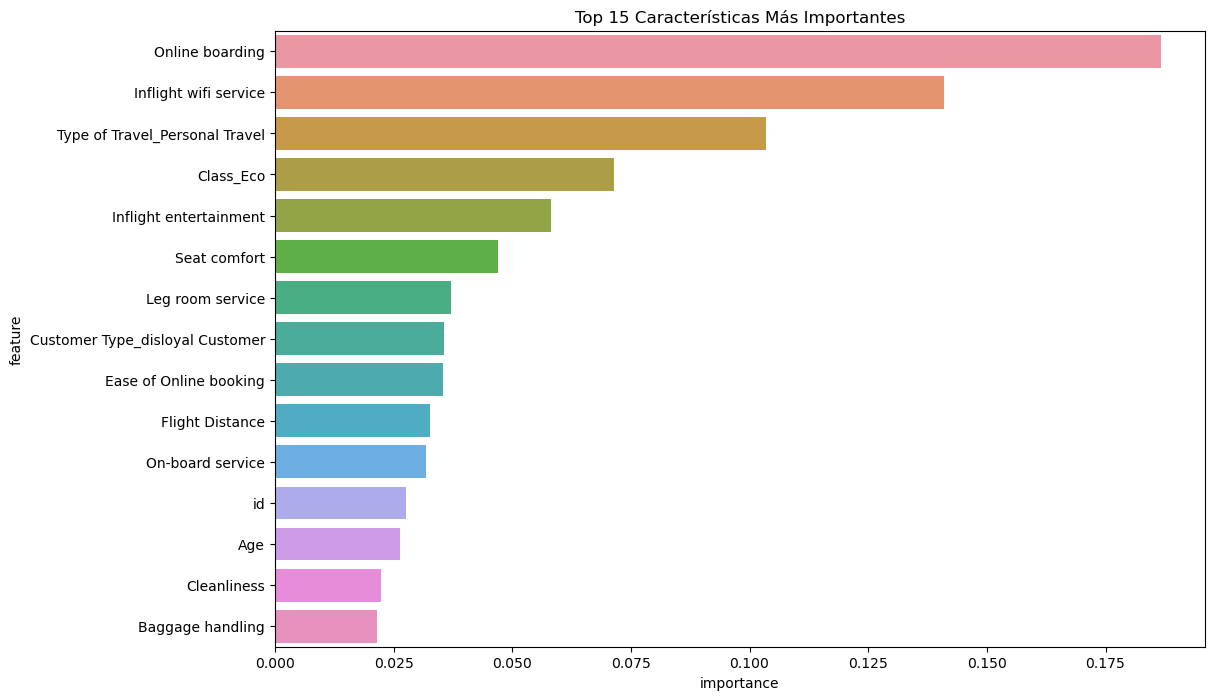

In [153]:
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Borrado de las dos primeras columnas
# columnas_a_borrar = ['Unnamed: 0', 'id']
# df = df.drop(columnas_a_borrar, axis=1)

# Imputar los valores nulos con la media
imputer = SimpleImputer(strategy='median')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Escalar las características imputadas
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

# 1. Random Forest: Crear y entrenar el modelo
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)
# Realizar predicciones
y_pred_rf = rf_model.predict(X_test_scaled)
y_pred_proba_rf = rf_model.predict_proba(X_test_scaled)[:, 1]

# 2. Logistic Regression
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train_scaled, y_train)
y_pred_lr = lr_model.predict(X_test_scaled)
y_pred_proba_lr = lr_model.predict_proba(X_test_scaled)[:, 1]

# 3. Support Vector Machine (SVM)
svm_model = SVC(probability=True, random_state=42)
svm_model.fit(X_train_scaled, y_train)
y_pred_svm = svm_model.predict(X_test_scaled)
y_pred_proba_svm = svm_model.predict_proba(X_test_scaled)[:, 1]

# Evaluar y comparar los modelos
print("Evaluación del modelo Random Forest:")
print(classification_report(y_test, y_pred_rf))
print("Matriz de Confusión para Random Forest:")
print(confusion_matrix(y_test, y_pred_rf))
print("AUC-ROC para Random Forest:")
print(roc_auc_score(y_test, y_pred_proba_rf))

print("\nEvaluación del modelo Logistic Regression:")
print(classification_report(y_test, y_pred_lr))
print("Matriz de Confusión para Logistic Regression:")
print(confusion_matrix(y_test, y_pred_lr))
print("AUC-ROC para Logistic Regression:")
print(roc_auc_score(y_test, y_pred_proba_lr))

print("\nEvaluación del modelo SVM:")
print(classification_report(y_test, y_pred_svm))
print("Matriz de Confusión para SVM:")
print(confusion_matrix(y_test, y_pred_svm))
print("AUC-ROC para SVM:")
print(roc_auc_score(y_test, y_pred_proba_svm))

# Comparación de Overfitting
rf_train_score = rf_model.score(X_train_scaled, y_train)
rf_test_score = rf_model.score(X_test_scaled, y_test)
rf_overfitting = rf_train_score - rf_test_score

lr_train_score = lr_model.score(X_train_scaled, y_train)
lr_test_score = lr_model.score(X_test_scaled, y_test)
lr_overfitting = lr_train_score - lr_test_score

svm_train_score = svm_model.score(X_train_scaled, y_train)
svm_test_score = svm_model.score(X_test_scaled, y_test)
svm_overfitting = svm_train_score - svm_test_score

print("\nOverfitting Random Forest:", rf_overfitting)
print("Overfitting Logistic Regression:", lr_overfitting)
print("Overfitting SVM:", svm_overfitting)

# Calcular y visualizar la importancia de las características
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=feature_importance.head(15))
plt.title('Top 15 Características Más Importantes')
plt.show()


# Creación de una aplicación simple para productivizar el modelo

In [ ]:
import streamlit as st
import pandas as pd
import joblib

# Cargar el modelo entrenado y el scaler
model = joblib.load('rf_model.joblib')
scaler = joblib.load('scaler.joblib')

st.title('Predictor de Satisfacción de Clientes de F5 Airlines')

# Crear inputs para todas las características necesarias
age = st.slider('Edad', 0, 100, 30)
flight_distance = st.number_input('Distancia de vuelo', min_value=0)
wifi_service = st.slider('Servicio de WiFi a bordo', 0, 5, 3)
departure_arrival_time = st.slider('Conveniencia del horario de salida/llegada', 0, 5, 3)
ease_of_booking = st.slider('Facilidad de reserva en línea', 0, 5, 3)
# ... Añadir más inputs para todas las características necesarias ...

# Crear un botón para realizar la predicción
if st.button('Predecir Satisfacción'):
    # Crear un DataFrame con los inputs del usuario
    input_data = pd.DataFrame({
        'Age': [age],
        'Flight Distance': [flight_distance],
        'Inflight wifi service': [wifi_service],
        'Departure/Arrival time convenient': [departure_arrival_time],
        'Ease of Online booking': [ease_of_booking],
        # ... Añadir más características aquí ...
    })
    
    # Escalar los datos de entrada
    input_scaled = scaler.transform(input_data)
    
    # Realizar la predicción
    prediction = model.predict(input_scaled)
    probability = model.predict_proba(input_scaled)[0][1]
    
    # Mostrar el resultado
    st.write(f"Predicción: {'Satisfecho' if prediction[0] == 1 else 'Insatisfecho'}")
    st.write(f"Probabilidad de satisfacción: {probability:.2f}")